In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [2]:
df_socmed = pd.read_csv('hookit_data_sept17.csv', index_col=0, header=0, parse_dates=True)
df_playerdata = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)
df_clubrev = pd.read_csv('Club Revenue Deloitte.csv', parse_dates=True)

In [3]:
df_playerdata['Name'].replace(
    to_replace=['Neymar'],
    value='Neymar da Silva',
    inplace=True
)


In [4]:
df_playerdata_merge = pd.merge(left=df_playerdata,right=df_socmed, left_on='Name', right_on='name')

In [5]:
df_playerdata_merge.head(n=40)

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,...,Continent,Continent.specific,name,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets
0,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,...,Europe,Western Europe,Benjamin Mendy,NaN,478109.0,723194.0,1201303,275900.0,168.0,4400000.0
1,Leroy Sane,"Jan 11, 1996","Essen, Germany",21,1.84,NaN,"Germany, France",Striker - Left Wing,left,Manchester City,...,Europe,Central Europe,Leroy Sane,311793.0,184615.0,1253264.0,1749672,143500.0,52.0,1900000.0
2,Sergio Aguero,"Jun 2, 1988","Buenos Aires, Argentina",29,1.73,NaN,"Argentina, Spain",Striker - Centre-Forward,right,Manchester City,...,South America,South,Sergio Aguero,11083383.0,12115007.0,7432927.0,30631317,356700.0,47.0,2800000.0
3,Gabriel Jesus,"Apr 3, 1997","Sao Paulo, Brazil",20,1.75,NaN,Brazil,Striker - Centre-Forward,right,Manchester City,...,South America,Brazil,Gabriel Jesus,NaN,NaN,NaN,0,NaN,NaN,NaN
4,Thibaut Courtois,"May 11, 1992","Bree, Belgium",25,1.99,NaN,Belgium,Goalkeeper,left,Chelsea FC,...,Europe,Central Europe,Thibaut Courtois,5428743.0,1891584.0,4027589.0,11347916,130600.0,64.0,2900000.0
5,David Luiz,"Apr 22, 1987","Diadema, Brazil",30,1.89,NaN,"Brazil, Portugal",Defence - Centre-Back,both,Chelsea FC,...,South America,Brazil,David Luiz,25924523.0,8604135.0,17190690.0,51719348,38500.0,40.0,7100000.0
6,Eden Hazard,"Jan 7, 1991","La Louviere, Belgium",26,1.73,NaN,Belgium,Striker - Left Wing,both,Chelsea FC,...,Europe,Central Europe,Eden Hazard,8938343.0,5125924.0,10528208.0,24592475,507800.0,25.0,10600000.0
7,Alvaro Morata,"Oct 23, 1992","Madrid, Spain",24,1.89,NaN,Spain,Striker - Centre-Forward,right,Chelsea FC,...,Europe,Southern Europe,Alvaro Morata,7550830.0,3968453.0,7404470.0,18923753,398800.0,37.0,8500000.0
8,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker - Centre-Forward,both,Chelsea FC,...,Europe,Central Europe,Michy Batshuayi,773965.0,905794.0,1262900.0,2942659,159900.0,78.0,3300000.0
9,David de Gea,"Nov 7, 1990","Madrid, Spain",26,1.89,NaN,Spain,Goalkeeper,right,Manchester United,...,Europe,Southern Europe,David de Gea,6639054.0,8951138.0,7554932.0,23145124,638600.0,41.0,4100000.0


In [10]:
df_playerdata_merge['aipp'] = df_playerdata_merge.interactions_likes_comments_retweets / df_playerdata_merge.posts 

In [11]:
df_playerdata_new= df_playerdata_merge[['Name', 'Nationality', 'Age', 'Place.of.birth', 'Continent', 'Position','Current.club', 'facebook', 'twitter', 'instagram', 'total_followers', 'posts','interactions_likes_comments_retweets', 'aipp']]

In [13]:
df_playerdata_new.head(n=30)

,Name,Nationality,Age,Place.of.birth,Continent,Position,Current.club,facebook,twitter,instagram,total_followers,posts,interactions_likes_comments_retweets,aipp
0,Benjamin Mendy,"France, Senegal",23,"Longjumeau, France",Europe,Defence - Left-Back,Manchester City,NaN,478109.0,723194.0,1201303,168.0,4400000.0,2.619048e+04
1,Leroy Sane,"Germany, France",21,"Essen, Germany",Europe,Striker - Left Wing,Manchester City,311793.0,184615.0,1253264.0,1749672,52.0,1900000.0,3.653846e+04
2,Sergio Aguero,"Argentina, Spain",29,"Buenos Aires, Argentina",South America,Striker - Centre-Forward,Manchester City,11083383.0,12115007.0,7432927.0,30631317,47.0,2800000.0,5.957447e+04
3,Gabriel Jesus,Brazil,20,"Sao Paulo, Brazil",South America,Striker - Centre-Forward,Manchester City,NaN,NaN,NaN,0,NaN,NaN,NaN
4,Thibaut Courtois,Belgium,25,"Bree, Belgium",Europe,Goalkeeper,Chelsea FC,5428743.0,1891584.0,4027589.0,11347916,64.0,2900000.0,4.531250e+04
5,David Luiz,"Brazil, Portugal",30,"Diadema, Brazil",South America,Defence - Centre-Back,Chelsea FC,25924523.0,8604135.0,17190690.0,51719348,40.0,7100000.0,1.775000e+05
6,Eden Hazard,Belgium,26,"La Louviere, Belgium",Europe,Striker - Left Wing,Chelsea FC,8938343.0,5125924.0,10528208.0,24592475,25.0,10600000.0,4.240000e+05
7,Alvaro Morata,Spain,24,"Madrid, Spain",Europe,Striker - Centre-Forward,Chelsea FC,7550830.0,3968453.0,7404470.0,18923753,37.0,8500000.0,2.297297e+05
8,Michy Batshuayi,"Belgium, Congo DR",23,"Brussel, Belgium",Europe,Striker - Centre-Forward,Chelsea FC,773965.0,905794.0,1262900.0,2942659,78.0,3300000.0,4.230769e+04
9,David de Gea,Spain,26,"Madrid, Spain",Europe,Goalkeeper,Manchester United,6639054.0,8951138.0,7554932.0,23145124,41.0,4100000.0,1.000000e+05


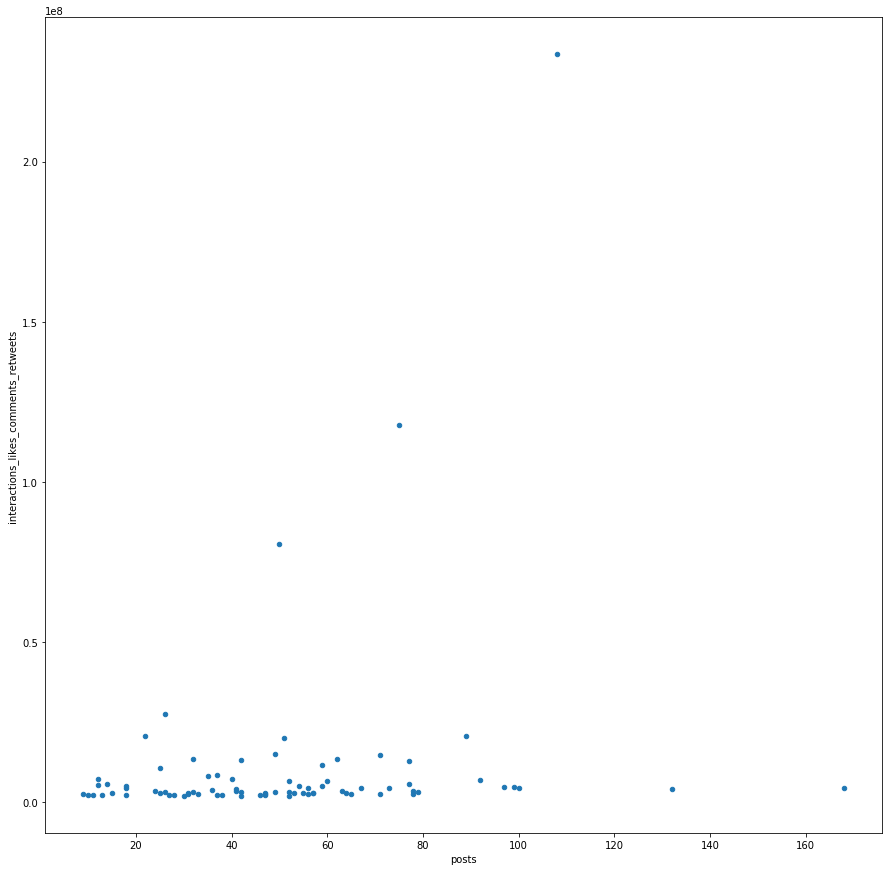

In [15]:
df_playerdata_new.plot(kind='scatter', x ='posts', y='interactions_likes_comments_retweets', figsize=(15, 15))

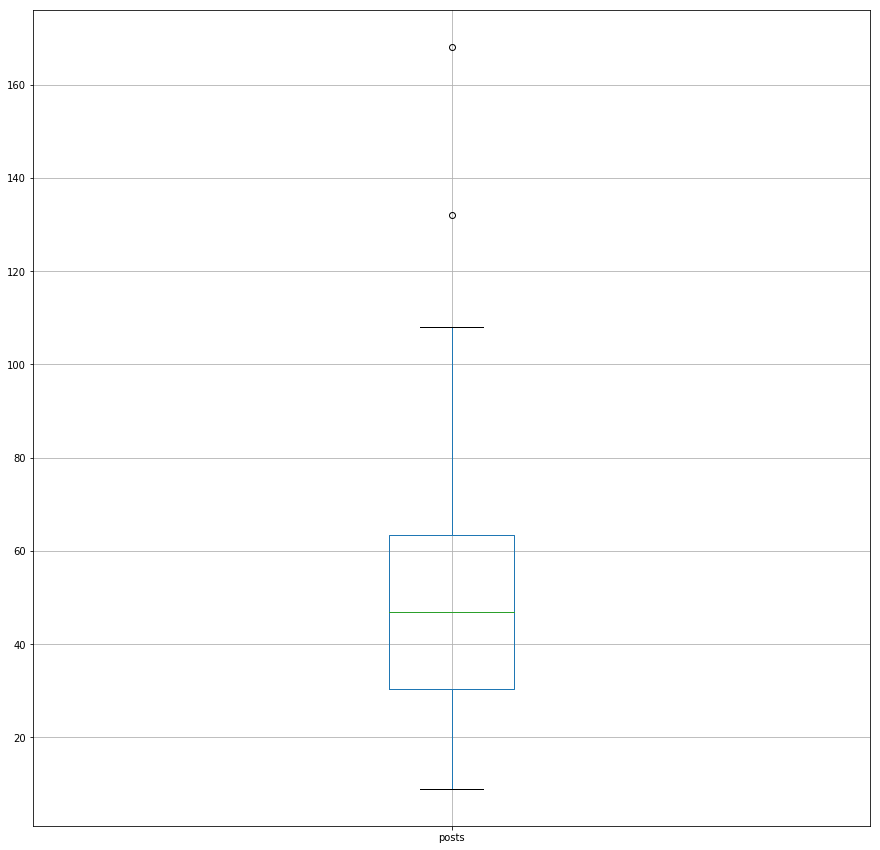

In [16]:
df_playerdata_new.boxplot(column='posts', figsize = (15,15))

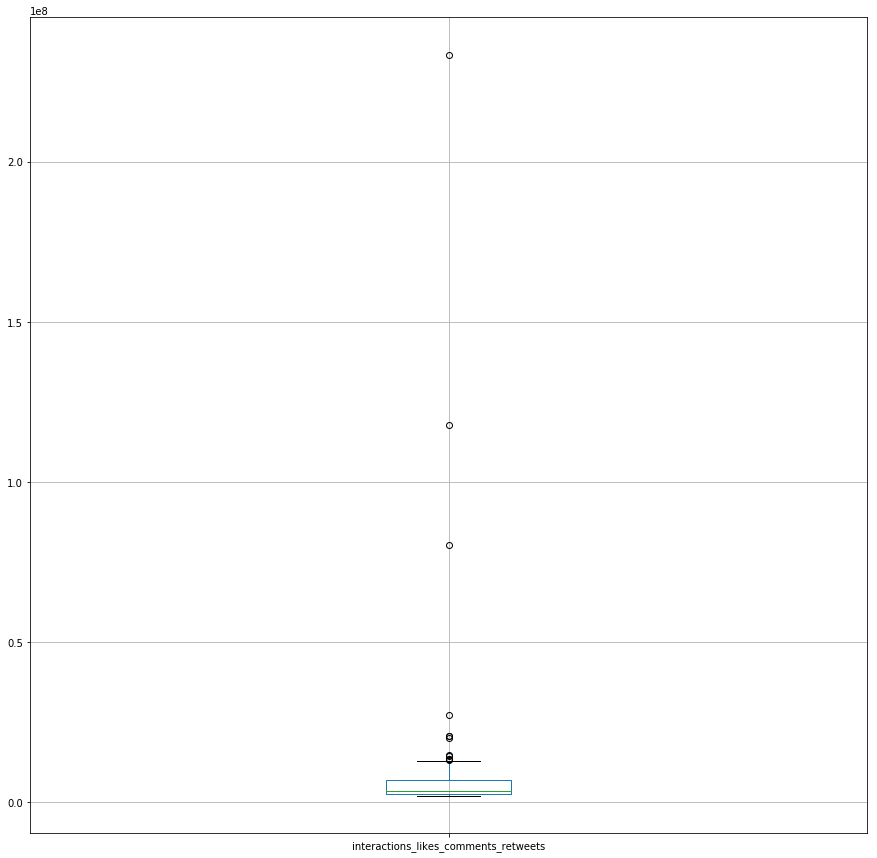

In [17]:
df_playerdata_new.boxplot(column='interactions_likes_comments_retweets', figsize = (15,15))

In [18]:
df_playerdata_new.describe()

,facebook,twitter,instagram,total_followers,posts,interactions_likes_comments_retweets,aipp
count,7.300000e+01,7.400000e+01,7.800000e+01,8.000000e+01,79.000000,7.900000e+01,7.900000e+01
mean,1.053327e+07,4.606553e+06,1.027926e+07,2.389495e+07,50.202532,1.082911e+07,2.171866e+05
std,1.941711e+07,8.492922e+06,1.806572e+07,4.332905e+07,28.825905,2.994369e+07,3.636681e+05
min,6.740000e+03,8.900000e+01,1.170500e+04,0.000000e+00,9.000000,1.900000e+06,2.619048e+04
25%,1.169228e+06,7.886948e+05,2.481908e+06,3.900298e+06,30.500000,2.500000e+06,5.255411e+04
50%,4.689963e+06,1.919138e+06,4.821394e+06,1.140531e+07,47.000000,3.500000e+06,8.474576e+04
75%,9.474324e+06,4.331352e+06,1.026958e+07,2.176049e+07,63.500000,6.700000e+06,2.093707e+05
max,1.225860e+08,6.037089e+07,1.123462e+08,2.953031e+08,168.000000,2.335000e+08,2.162037e+06


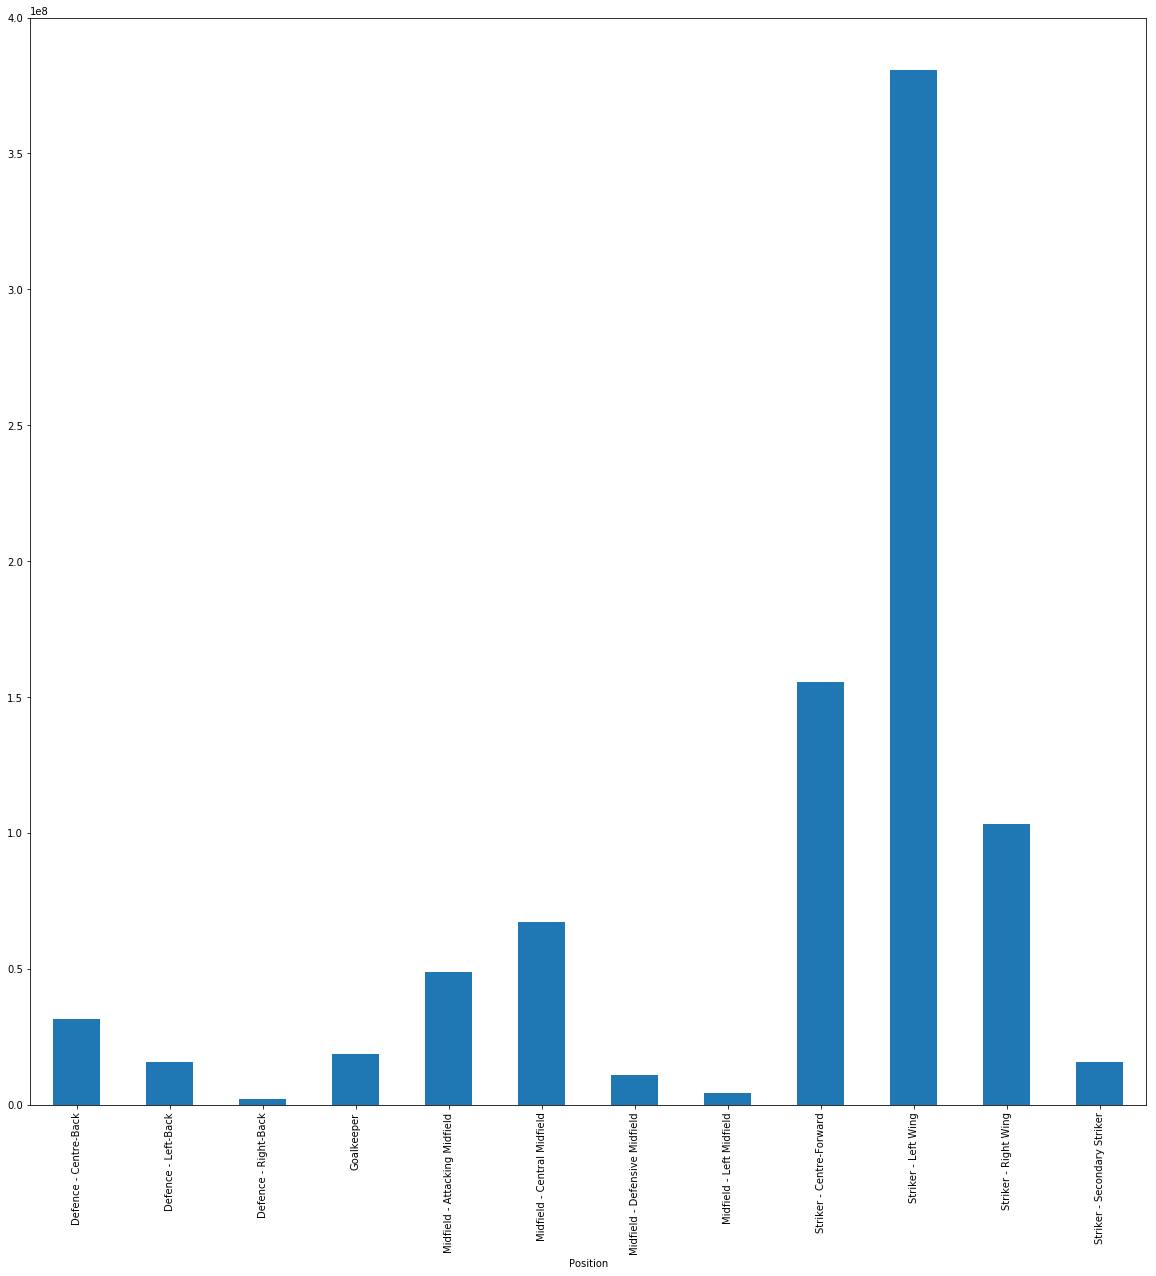

In [21]:
group_data = df_playerdata_new.groupby(['Position'])['interactions_likes_comments_retweets'].sum()
group_data.plot.bar(figsize=(20, 20))

In [ ]:
'''ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'interactions_likes_comments_retweets', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)'''

# plot table
'''ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()'''

In [25]:
df_playerdata_new.dtypes
#df_playerdata_new.boxplot(column='Age', figsize = (15,15))

Name                                     object
Nationality                              object
Age                                      object
Place.of.birth                           object
Continent                                object
Position                                 object
Current.club                             object
facebook                                float64
twitter                                 float64
instagram                               float64
total_followers                           int64
posts                                   float64
interactions_likes_comments_retweets    float64
aipp                                    float64
dtype: object

In [37]:
age = df_playerdata_new['Age']
age.head()

0    23.0
1    21.0
2    29.0
3    20.0
4    25.0
Name: Age, dtype: float64